In [51]:
import clustertools as cts
import numpy as np
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014,PlummerPotential
from galpy.util import conversion

# Orbits and Tidal Tails

For cases where a cluster's galactocentric position and velocity are known  and a ``galpy`` potential (Bovy J., 2015, ApJS, 216, 29) is given, it is possible to calculate additional cluster properties based on their orbit. 

To begin, lets load the final snapshot of an N-body simulation that was meant to reproduce the Galactic globular cluster Pal 5. Note one could have used ``load_cluster(ctype='limepy',gcname='Pal5')`` to generate a Pal 5 - like cluster, but it would not have any tidal tails (which will also be discussed here). The external tidal field is assumed to be equal to the ``MWPotential2014`` model from Bovy (2015). For all types of orbit analysis, this can be replaced with a different ``galpy`` potential using the ``pot`` variable.


0

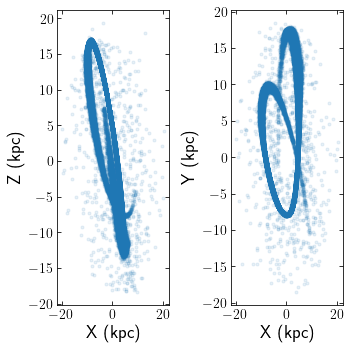

In [4]:
cluster = cts.load_cluster('snapshot',filename='pal5.dat', units='kpckms',origin='galaxy')
cts.starplot(cluster)

If you wish to extract the orbit of the cluster as a ``galpy`` orbit to analyze within ``galpy``, simply initialize the orbit via:

In [5]:
cluster.initialize_orbit()

After the above step, ``cluster.orbit`` now contains the ``galpy`` orbit. You can also integrate the orbit forwards to ``tfinal`` Gyr, with the option to do the standard ``galpy`` orbit plot. For illustrative purposes, I have shown how the ``pot`` variable can be used to specify the background potential.

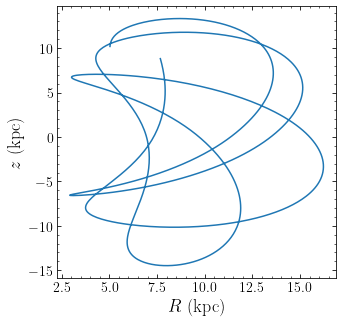

In [13]:
ts=np.linspace(0,1/conversion.time_in_Gyr(ro=cluster.orbit._ro,vo=cluster.orbit._vo),1000)
cluster.orbit.integrate(ts,MWPotential2014)
cluster.orbit.plot()

If instead you wish to extract that orbital path +/- ``dt`` Gyr from the cluster's current position, you can run the below command which also has a plot option. Note the default ``dt`` is 0.1 Gyr, but for this particular snapshot a ``dt`` of 0.3 Gyr is needed to approximately cover the length of the tails.

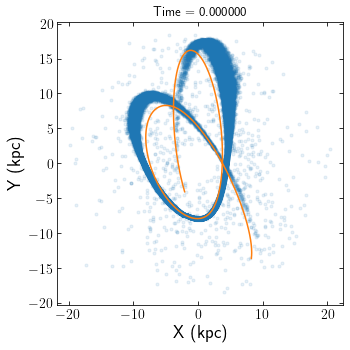

In [15]:
t,x,y,z,vx,vy,vz=cluster.orbital_path(plot=True,pot=MWPotential2014,dt=0.3)

A related feature implemented in ``clustertools`` is the ability to find the distance of each star from the stream path (``dpath``) and its distance along the stream path from the progenitor (``dprog``). When calling ``orbital_path_match``, the timestep along the orbital path that each star is closest to is also returned (``tpath``).

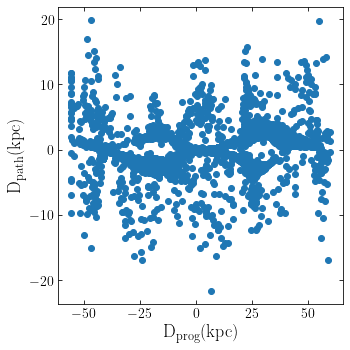

In [16]:
t,dprog,dpath=cluster.orbital_path_match(pot=MWPotential2014,plot=True,dt=0.3)

Alternatively one can calculate what ``clustertools`` calls the tail path. To determine the tail path, ``clustertools`` first matches each star to the orbital path, bins stars along the orbital path, and then finds the mean position and velocity of stars in the same bin. The tail path better follows tidal tail stars which are generally offset from the orbital path due to them having non-zero velocities when they escape the cluster. 

(array([-0.003, -0.003, -0.003, ...,  0.033, -0.135,  0.045]),
 array([  0.        ,   0.        ,   0.        , ...,   8.16113693,
        -22.17925342,  12.00729019]),
 array([-0.1377047 ,  0.13570313,  0.13583119, ...,  0.05525546,
        -0.3445197 , -0.15470062]))

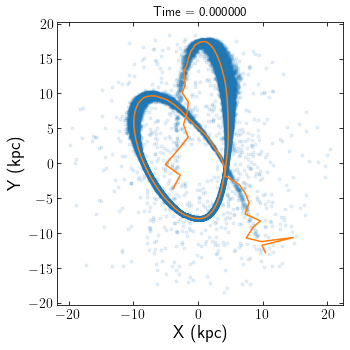

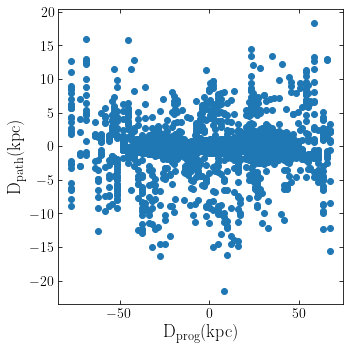

In [17]:
cluster.tail_path(pot=MWPotential2014,plot=True,dt=0.3,filename='../images/tail_path.png')
cluster.tail_path_match(pot=MWPotential2014,plot=True,dt=0.3,filename='../images/tail_path_match.png')

Finally, ``clustertools`` also allows for a system to be interpolated to a past or future timestep. Note this does NOT handle any internal cluster evolution, as it simply moves all cluster stars to a new orbital position. The advanage to the orbit interpolation function is that you can specificy what constitutes a tail star and integrate their orbits separately. This function allows one to more directly compare the tidal tail systems of N-body simulations to an observed cluster by ensuring the N-body system is at the exact same position as the progenitor. 

For example, start with the Pal 5-like system initialized using ``load_cluster`` and moved to ``origin='galaxy'`` and ``units='kpckms'``.

LOAD_CLUSTER MADE USE OF:
Gieles, M. & Zocchi, A. 2015, MNRAS, 454, 576
Vasiliev E., 2019, MNRAS, 484,2832 
de Boer, T. J. L., Gieles, M., Balbinot, E., Hénault-Brunet, V., Sollima, A., Watkins, L. L., Claydon, I. 2019, MNRAS, 485, 4906


0

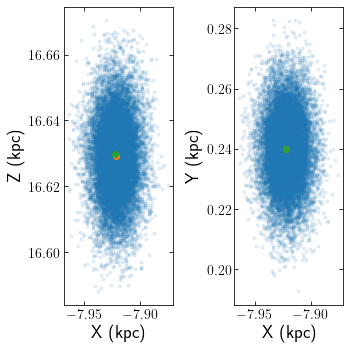

In [48]:
cluster = cts.load_cluster('limepy',gcname='Pal5',origin='galaxy',units='kpckms')
cts.starplot(cluster,do_centre=True)

If we then interpolate the system 1 Gyr ahead in time, the centre of the cluster will move but the clustercentric positions and velocities of the stars themselves will stay the same

0

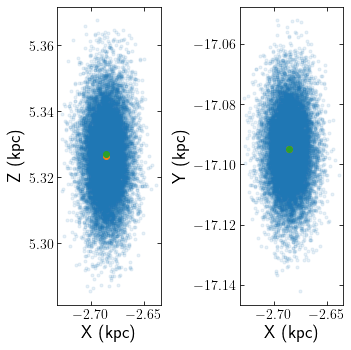

In [49]:
cluster.interpolate_orbit(pot=MWPotential2014,tfinal=1.0)
cts.starplot(cluster,do_centre=True)

Alternatively you can use ``interpolate_orbits`` which will interpolate the orbits of stars within the cluster. If ``origin=centre`` or ``origin=cluster``, ``clustertools`` will assume it is the cluster's potential that is being provided and orbits will be integrated within the cluster. If ``origin='galaxy'``, ``clustertools`` will assume its the galactic potential being provided. This type of interpolation is really only valid for a stellar stream, unless the combined potential of the galaxy and cluster are provided (see ``MovingPotential`` within galpy's documentation).

LOAD_CLUSTER MADE USE OF:
Gieles, M. & Zocchi, A. 2015, MNRAS, 454, 576
Vasiliev E., 2019, MNRAS, 484,2832 
de Boer, T. J. L., Gieles, M., Balbinot, E., Hénault-Brunet, V., Sollima, A., Watkins, L. L., Claydon, I. 2019, MNRAS, 485, 4906


0

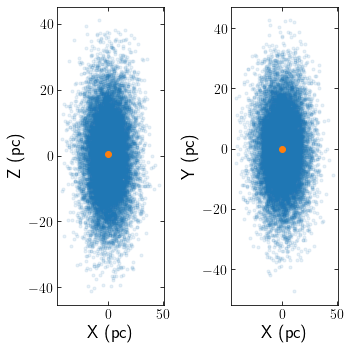

In [50]:
cluster = cts.load_cluster('limepy',gcname='Pal5',origin='cluster',units='pckms')
cts.starplot(cluster,do_centre=True)

To interpolate stars within the cluster, lets assume the cluster's potential is a Plummer Sphere. Also note that ``tfinal`` is given in Myr since ``units=pckms``

In [65]:
pot=PlummerPotential(cluster.mtot/conversion.mass_in_msol(ro=cts.solar_ro,vo=cts.solar_vo),b=cluster.rm/1.35/1000.0/cts.solar_ro,ro=cts.solar_ro,vo=cts.solar_vo)
cluster.interpolate_orbits(pot=pot,tfinal=1000.0)

(array([ 11.59572769,   0.95623214,  14.2863604 , ...,  -3.77708713,
          5.22205115,  32.80459632]),
 array([  5.83316167,  -3.9241265 ,   0.38257955, ...,  -2.77492491,
        -14.37295971,  -8.55818563]),
 array([-25.57823186,  13.7278332 ,   4.80080577, ...,  -1.37630229,
          5.89919572, -10.26786413]),
 array([ 0.17655621, -1.65057888, -1.41115046, ...,  1.76647311,
         0.24200173, -0.52645193]),
 array([-0.27582806,  0.15694956,  0.21902343, ...,  0.01127535,
        -0.38737009,  0.03612889]),
 array([ 0.35362484, -0.22729379, -0.93399453, ..., -0.11822434,
        -0.6522938 , -0.3743652 ]))

A quick check reveals the stellar positions have moved

0

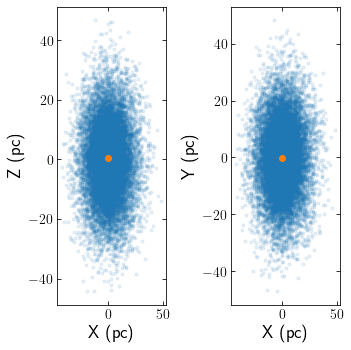

In [67]:
cts.starplot(cluster,do_centre=True)